### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [21]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [22]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [23]:
# Any missing values?
# Replace the missing values with 0.
reviews.fillna(0, inplace=True)

# Determine the number of missing values.
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [24]:
# Explore the data.
# View the metadata.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [25]:
# View the DateFrame.
print(reviews.dtypes)
print(reviews)

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object
      gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                

In [26]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [27]:
# Drop unnecessary columns.
reviews.drop(['language', 'platform'], axis=1, inplace=True)

# View column names.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 3. Rename columns

In [28]:
# Rename the column headers.
reviews.columns = ['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points', 'education', 'product', 'review', 'summary']

# View column names.
reviews.head()

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 4. Save the DataFrame as a CSV file

In [29]:
# Create a CSV file as output.
reviews.to_csv('reviews.csv')

In [30]:
# Import new CSV file with Pandas.
reviews = pd.read_csv('reviews.csv')

# View DataFrame.
reviews

,Unnamed: 0,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...
1995,1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


## 5. Linear regression

### 5a) spending vs loyalty

In [51]:
# Independent variable.
x = reviews['spending_score'] 

# Dependent variable.
y = reviews['loyalty_points'] 

# OLS model and summary.
# Run the OLS test.
f = 'y ~ X'
spendingmodel = ols(f, data = reviews).fit()

# View the output.
spendingmodel.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Thu, 22 Jun 2023   Prob (F-statistic):          2.43e-209
Time:                        11:23:32   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
X             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Extract the estimated parameters.


# Extract the standard errors.
Standard errors have a y intercept of 52.171 & X coefficient value of 0.978

# Extract the predicted values.


In [52]:
# Set the X coefficient and the constant to generate the regression table.
# x coef: 34.19
# Constant coef: -65.69
# Create the linear equation.
y_pred = -65.69 + 34.19 * x

# View the output.
y_pred


0       1267.72
1       2703.70
2        139.45
3       2566.94
4       1301.91
         ...   
1995    2293.42
1996     207.83
1997    3045.60
1998     481.35
1999     207.83
Name: spending_score, Length: 2000, dtype: float64

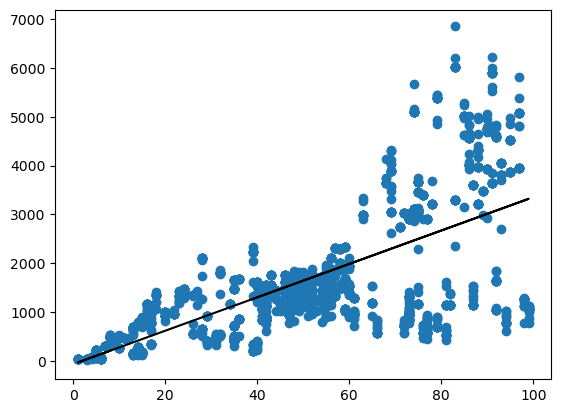

In [53]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(x, y)

# Plot the line.
plt.plot(x, y_pred, color='black')

### 5b) renumeration vs loyalty

In [57]:
# Independent variable.
t = reviews['renumeration'] 

# Dependent variable.
p = reviews['loyalty_points'] 

# OLS model and summary.
# Run the OLS test.
f = 'p ~ t'
renumerationmodel = ols(f, data = reviews).fit()

# View the output.
renumerationmodel.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Thu, 22 Jun 2023   Prob (F-statistic):          2.43e-209
Time:                        11:30:06   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
t             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Extract the estimated parameters.


# Extract the standard errors.


# Extract the predicted values.


In [58]:
# Set the the X coefficient and the constant to generate the regression table.
# x coef: 0.978
# Constant coef: 52.171
# Create the linear equation.
y_predr = 52.171 + 0.978 * t

# View the output.
y_predr



0        64.20040
1        64.20040
2        65.00236
3        65.00236
4        65.80432
          ...    
1995    134.77288
1996    142.79248
1997    142.79248
1998    148.40620
1999    142.79248
Name: renumeration, Length: 2000, dtype: float64

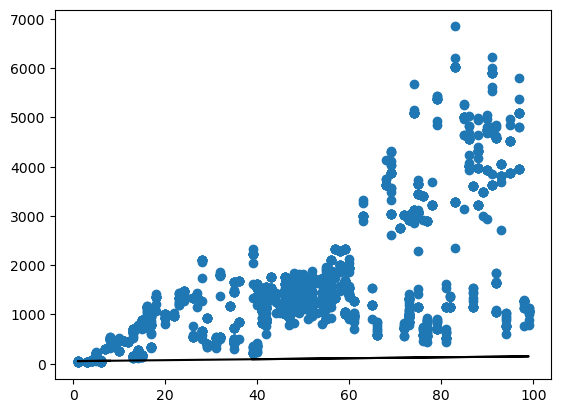

In [47]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(t, p)

# Plot the line.
plt.plot(x, y_predr, color='black')

### 5c) age vs loyalty

In [59]:
# Independent variable.
u = reviews['age'] 

# Dependent variable.
b = reviews['loyalty_points']

# OLS model and summary.
# Run the OLS test.
f = 'y ~ b'
agemodel = ols(f, data = reviews).fit()

# View the output.
agemodel.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.981e+34
Date:                Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:31:04   Log-Likelihood:                 54220.
No. Observations:                2000   AIC:                        -1.084e+05
Df Residuals:                    1998   BIC:                        -1.084e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.137e-13   1.45e-14     -7.867      0.000   -1.42e-13   -8.53e-14
b              1.0000   7.11e-18   1.41e+17      0.000       1.000       1.000
==============================================================================
Omnibus:                      306.190   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              462.588
Skew:                          -1.169   Prob(JB):                    3.55e-101
Kurtosis:                       3.293   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Extract the estimated parameters.


# Extract the standard errors.


# Extract the predicted values.


In [60]:
# Set the X coefficient and the constant to generate the regression table.
# x coef: -4.012
# Constant coef: 1736.52
# Create the linear equation.
y_preda = 1736.52 - 4.012 * u

# View the output.
y_preda


0       1664.304
1       1644.244
2       1648.256
3       1636.220
4       1604.124
          ...   
1995    1588.076
1996    1564.004
1997    1600.112
1998    1600.112
1999    1608.136
Name: age, Length: 2000, dtype: float64

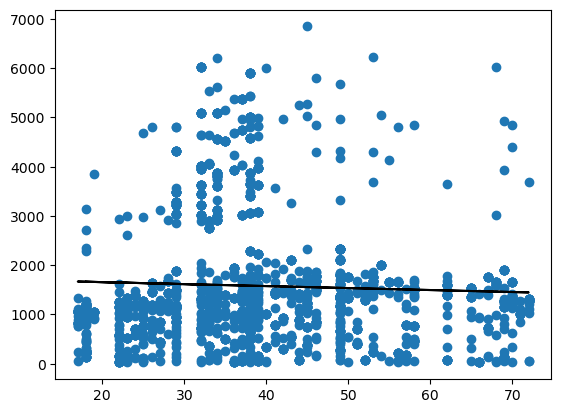

In [61]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(u, b)

# Plot the line.
plt.plot(u, y_preda, color='black')

## 6. Observations and insights

***Your observations here...***






# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [2]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the CSV file(s) as dataframe.
dataframe = pd.read_csv('reviews.csv')

# View DataFrame.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   renumeration    2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB


In [14]:
# Drop unnecessary columns.
df2 = dataframe.drop(columns=['gender', 'age', 'loyalty_points', 'education', 'product', 'review', 'summary'])

# View DataFrame.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   renumeration    2000 non-null   float64
 2   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 47.0 KB


In [6]:
# Explore the data.
# Determine the number of null values.
df2.isnull().sum()

Unnamed: 0        0
renumeration      0
spending_score    0
dtype: int64

In [7]:
# Descriptive statistics.
df2.describe()

,Unnamed: 0,renumeration,spending_score
count,2000.000000,2000.000000,2000.000000
mean,999.500000,48.079060,50.000000
std,577.494589,23.123984,26.094702
min,0.000000,12.300000,1.000000
25%,499.750000,30.340000,32.000000
50%,999.500000,47.150000,50.000000
75%,1499.250000,63.960000,73.000000
max,1999.000000,112.340000,99.000000


## 2. Plot

<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>

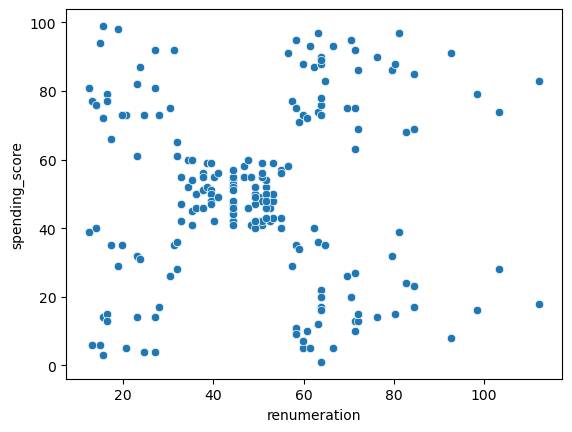

In [19]:
# Create a scatterplot with Seaborn.
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

sns.scatterplot(x='renumeration',
                y='spending_score',
                data=df2,
                )

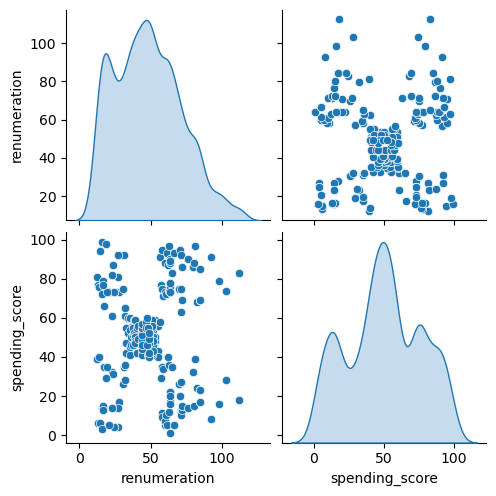

In [20]:
# Create a pairplot with Seaborn.
pair = df2[['renumeration', 'spending_score']]

sns.pairplot(df2,
             vars=pair,
             diag_kind='kde')

## 3. Elbow and silhoutte methods

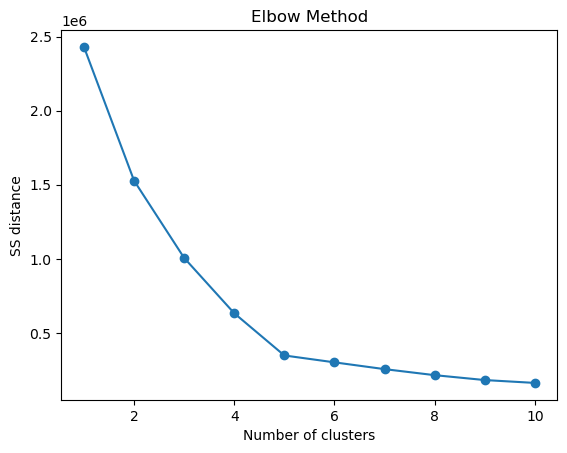

In [25]:
# Determine the number of clusters: Elbow method.
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(pair)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

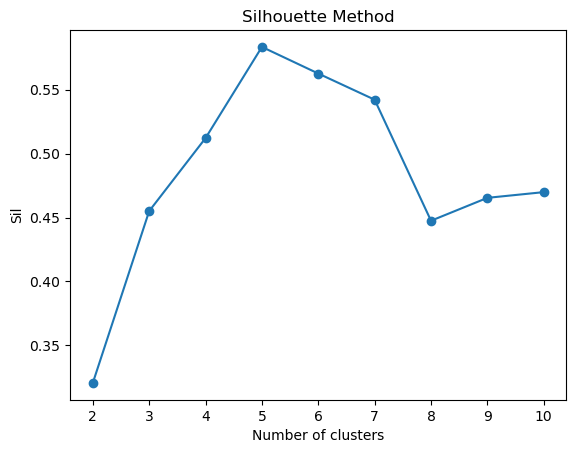

In [26]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(pair)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(pair,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

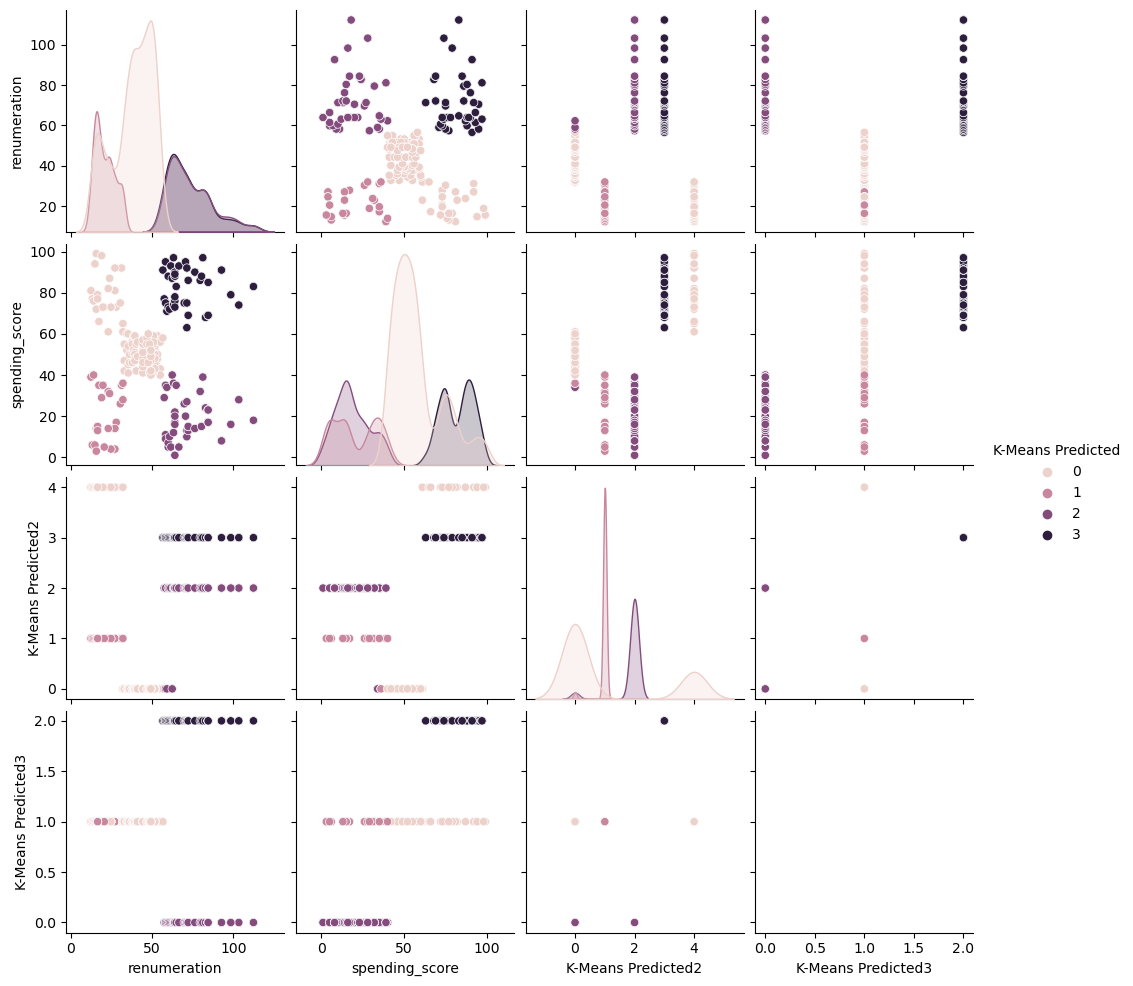

In [35]:
# Use 4 clusters
kmeans = KMeans(n_clusters = 4, 
                max_iter = 20000,
                init='k-means++',
                random_state=0).fit(pair)

clusters = kmeans.labels_

pair['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(pair,
             hue='K-Means Predicted',
             diag_kind= 'kde')



In [36]:
# Check the number of observations per predicted class.
pair['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

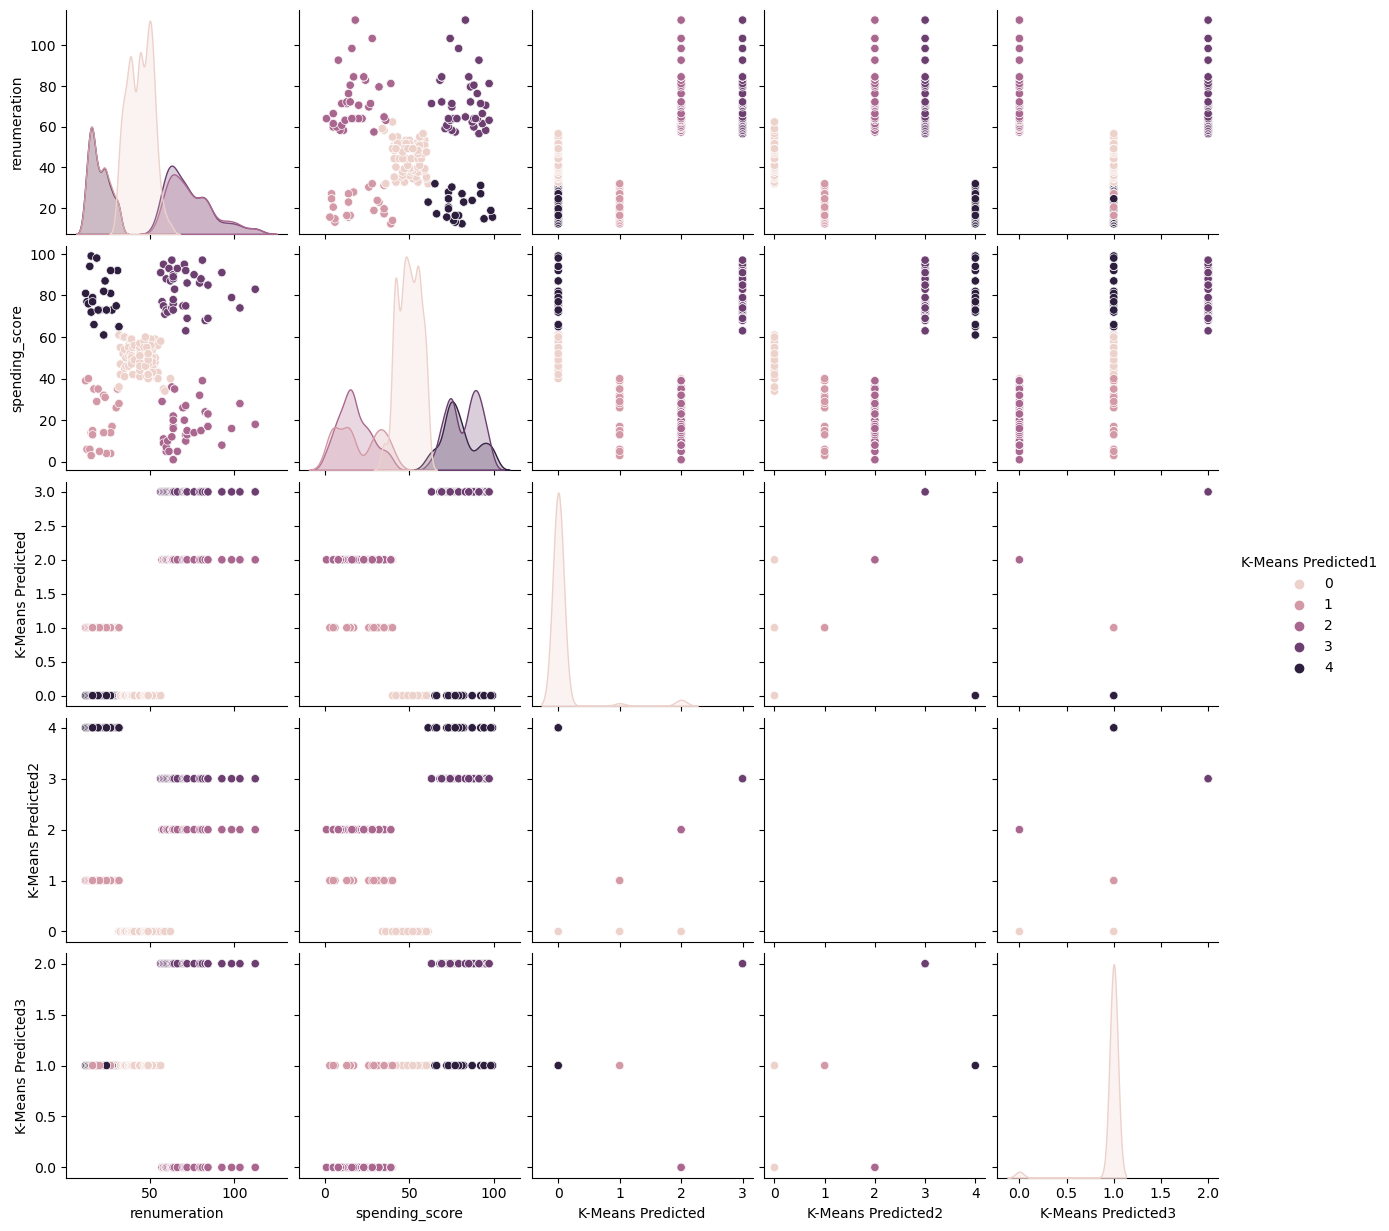

In [39]:
# Use 5 clusters
kmeans = KMeans(n_clusters = 5, 
                max_iter = 20000,
                init='k-means++',
                random_state=0).fit(pair)

clusters1 = kmeans.labels_

pair['K-Means Predicted1'] = clusters1

# Plot the predicted.
sns.pairplot(pair,
             hue='K-Means Predicted1',
             diag_kind= 'kde')

In [40]:
# Check the number of observations per predicted class.
pair['K-Means Predicted1'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted1, dtype: int64

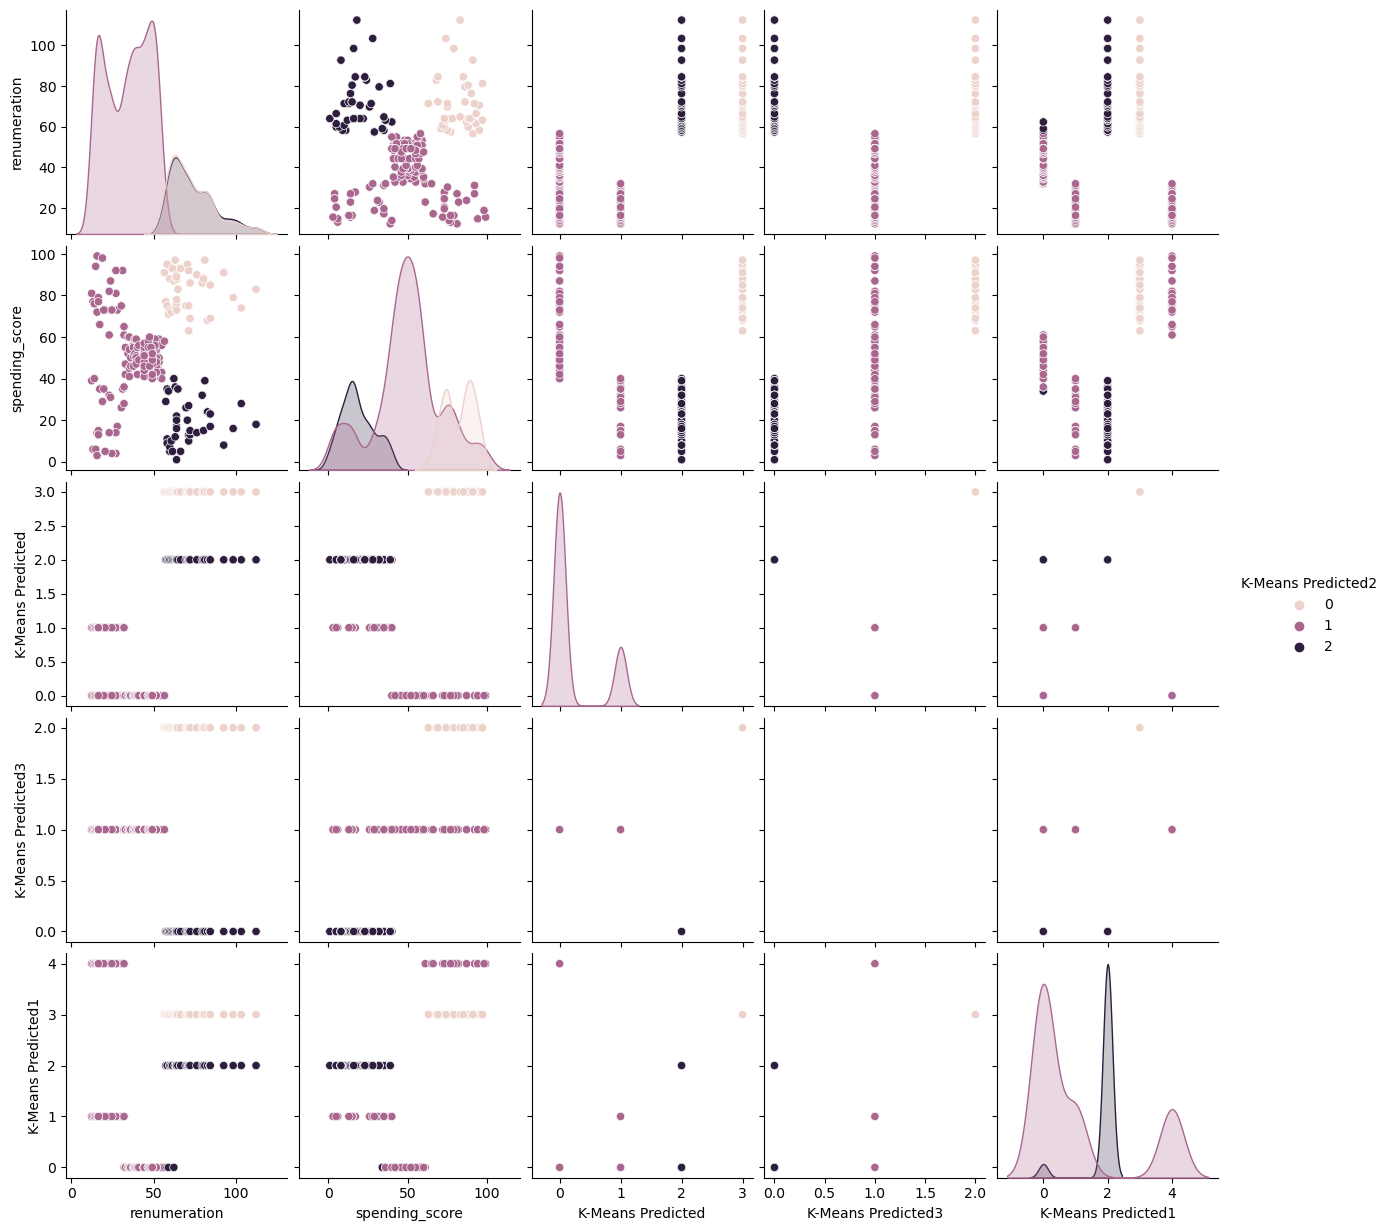

In [41]:
# Use 3 clusters
kmeans = KMeans(n_clusters = 3, 
                max_iter = 20000,
                init='k-means++',
                random_state=0).fit(pair)

clusters = kmeans.labels_

pair['K-Means Predicted2'] = clusters

# Plot the predicted.
sns.pairplot(pair,
             hue='K-Means Predicted2',
             diag_kind= 'kde')

In [42]:
# Check the number of observations per predicted class.
pair['K-Means Predicted2'].value_counts()

1    1293
0     356
2     351
Name: K-Means Predicted2, dtype: int64

## 5. Fit final model and justify your choice

In [38]:
# Apply the final model.
# View the K-Means predicted.
print(pair.head())

   renumeration  spending_score  K-Means Predicted  K-Means Predicted2  \
0         12.30              39                  1                   1   
1         12.30              81                  0                   4   
2         13.12               6                  1                   1   
3         13.12              77                  0                   4   
4         13.94              40                  1                   1   

   K-Means Predicted3  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  


In [ ]:
# Check the number of observations per predicted class.


## 6. Plot and interpret the clusters

<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>

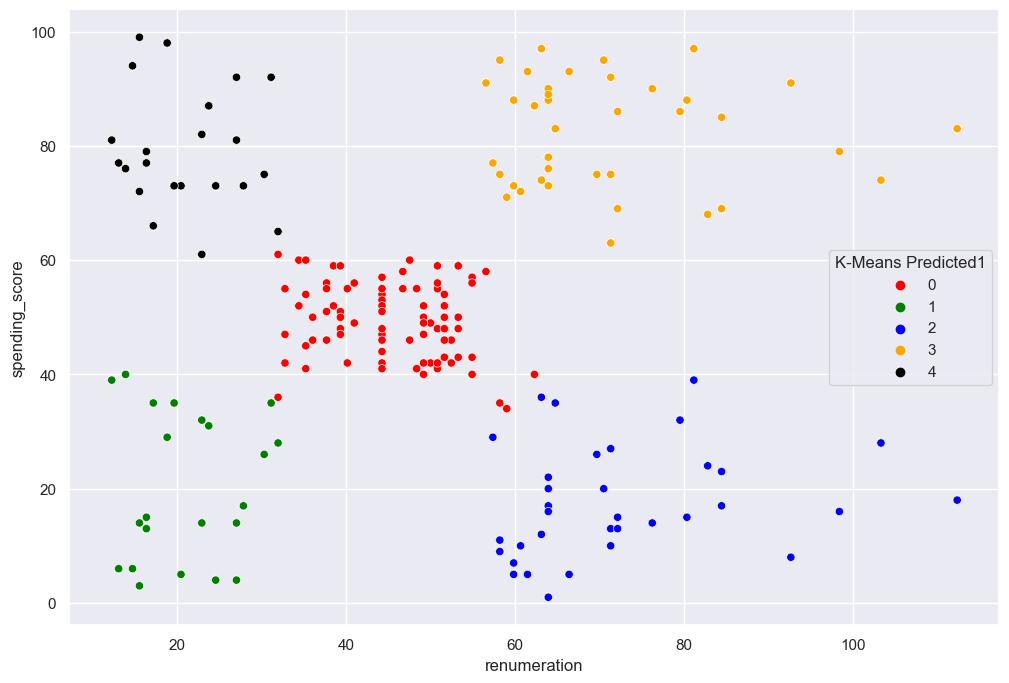

In [43]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='renumeration' , 
                y ='spending_score',
                data=pair,
                hue='K-Means Predicted1',
                palette=['red', 'green', 'blue', 'orange', 'black'])

# View the DataFrame.


In [ ]:
# Visualising the clusters.



## 7. Discuss: Insights and observations

***Your observations here...***

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [216]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt
import seaborn as sns

# nltk.download ('punkt').
# nltk.download ('stopwords').
# You might need to install WordCloud.
!pip install WordCloud
!pip install TextBlob

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [217]:
# Load the data set as df3.
# Load the CSV file(s) as dataframe.
dataframe3 = pd.read_csv('reviews.csv')

# View DataFrame.
dataframe3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   renumeration    2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB


In [218]:
dataframe3.rename(columns={'Unnamed: 0': 'count'}, inplace=True)

In [219]:
# Explore data set.
dataframe3.shape

(2000, 10)

In [220]:
# Keep necessary columns. Drop unnecessary columns.
df3 = dataframe3.drop(columns=['count', 'gender', 'age', 'renumeration', 'spending_score', 'loyalty_points', 'education', 'product'])

# View DataFrame.
df3

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [221]:
# Determine if there are any missing values.
df3.isnull().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [222]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,Another worthless Dungeon Master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,Five Stars
4,as my review of gf9's previous screens these w...,Money trap


In [223]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

df3

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap
...,...,...
1995,the perfect word game for mixed ages (with mom...,the perfect word game for mixed ages (with mom
1996,great game. did not think i would like it when...,super fun
1997,great game for all......... keeps the mind nim...,great game
1998,fun game!,four stars


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [224]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')


# View output.
df3

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon master's screen from...
2,nice art nice printing why two panels are fill...,"pretty, but also pretty useless"
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages (with mom
1996,great game did not think i would like it when ...,super fun
1997,great game for all keeps the mind nimble,great game
1998,fun game,four stars


In [225]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when ...,super fun
1997,great game for all keeps the mind nimble,great game
1998,fun game,four stars


### 2c) Drop duplicates in both columns

In [226]:
# Drop duplicates in both columns.
ddf3 = df3.drop_duplicates(subset=['review', 'summary'])

# View DataFrame.
ddf3

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when ...,super fun
1997,great game for all keeps the mind nimble,great game
1998,fun game,four stars


## 3. Tokenise and create wordclouds

In [227]:
# Create new DataFrame (copy DataFrame).
newdf = ddf3.copy()

# View DataFrame.
newdf

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when ...,super fun
1997,great game for all keeps the mind nimble,great game
1998,fun game,four stars


In [228]:
# Convert review to a string
newdf['review'] = newdf['review'].apply(str)

# Apply tokenisation to review column.
newdf['tokens1'] = newdf['review'].apply(word_tokenize)

# Convert summary to a string
newdf['summary'] = newdf['summary'].apply(str)

# Apply tokenisation to summary column
newdf['tokens2'] = newdf['summary'].apply(word_tokenize)

# View DataFrame.
newdf

,review,summary,tokens1,tokens2
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"
...,...,...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom,"[the, perfect, word, game, for, mixed, ages, w...","[the, perfect, word, game, for, mixed, ages, w..."
1996,great game did not think i would like it when ...,super fun,"[great, game, did, not, think, i, would, like,...","[super, fun]"
1997,great game for all keeps the mind nimble,great game,"[great, game, for, all, keeps, the, mind, nimble]","[great, game]"
1998,fun game,four stars,"[fun, game]","[four, stars]"


In [229]:
# Convert token columns to a string
newdf['tokens1'] = newdf['tokens1'].apply(str)

newdf['tokens2'] = newdf['tokens2'].apply(str)

In [230]:
# View the shape of the data
newdf.shape

(1961, 4)

In [231]:
# String all the comments together in a single variable.
# Create an empty string variable.
review_comments = ''
for i in range(newdf.shape[1]):
    # Add each comment.
    review_comments = review_comments + newdf['tokens1'][i]

In [232]:
# Review: Create a word cloud.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(review_comments)

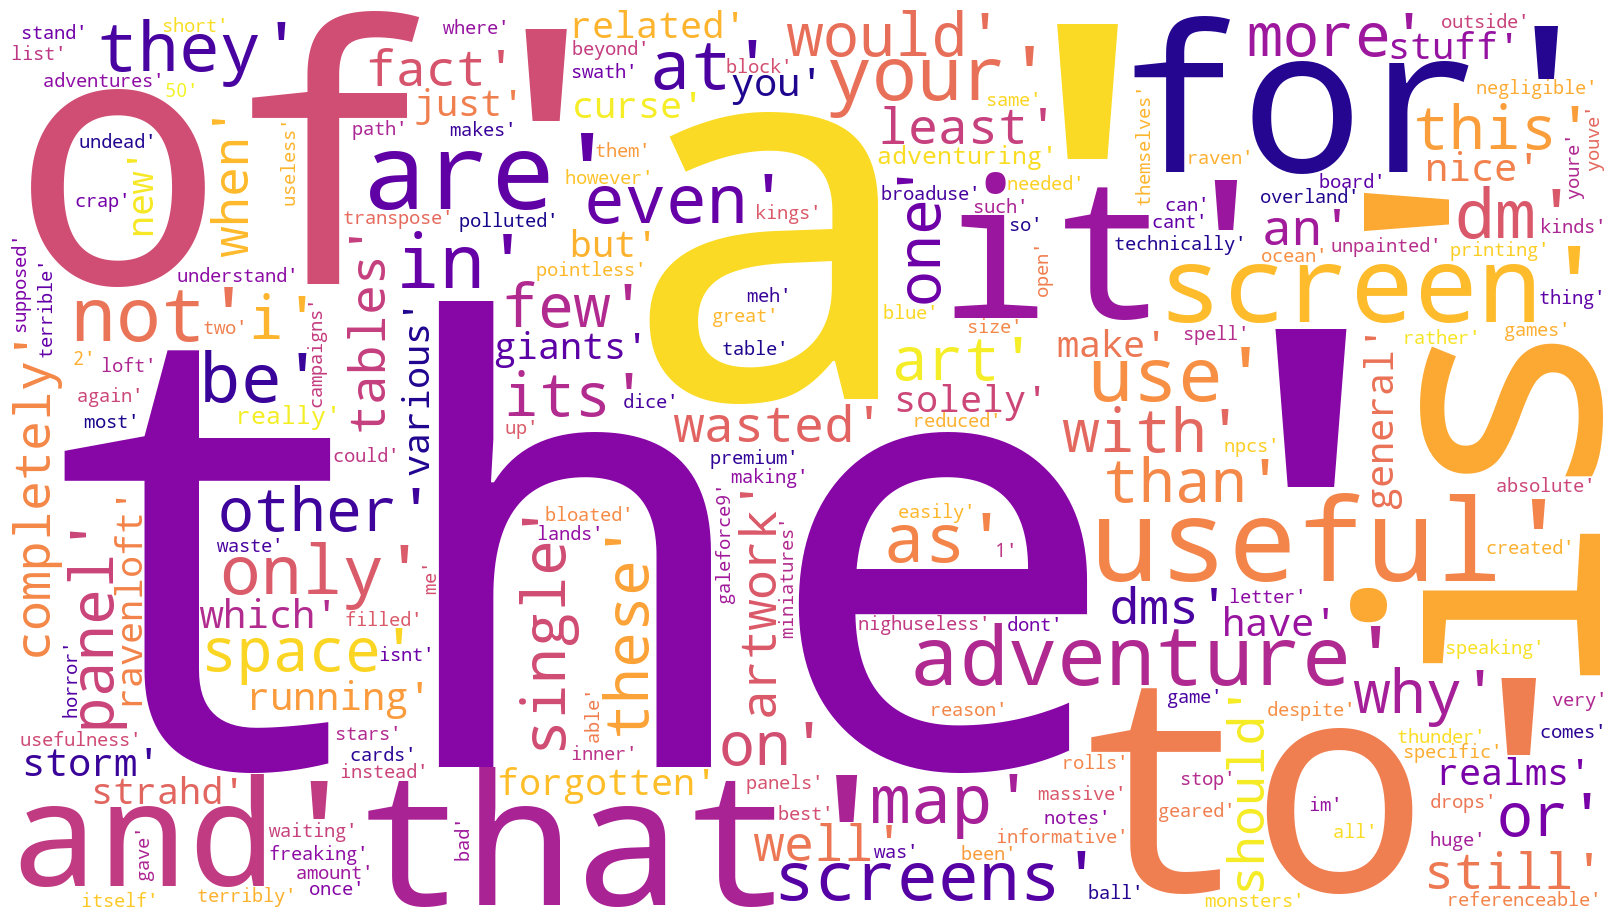

In [233]:
# Review: Plot the WordCloud image.
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# Note that your word cloud might differ slightly from the one provided.

In [234]:
# Summary: Create a word cloud.
# String all the comments together in a single variable.
# Create an empty string variable.
summary_comments = ''
for i in range(newdf.shape[1]):
    # Add each comment.
    summary_comments = summary_comments + newdf['tokens2'][i]

In [235]:
# Summary: Plot the WordCloud image.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud2 = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(summary_comments)

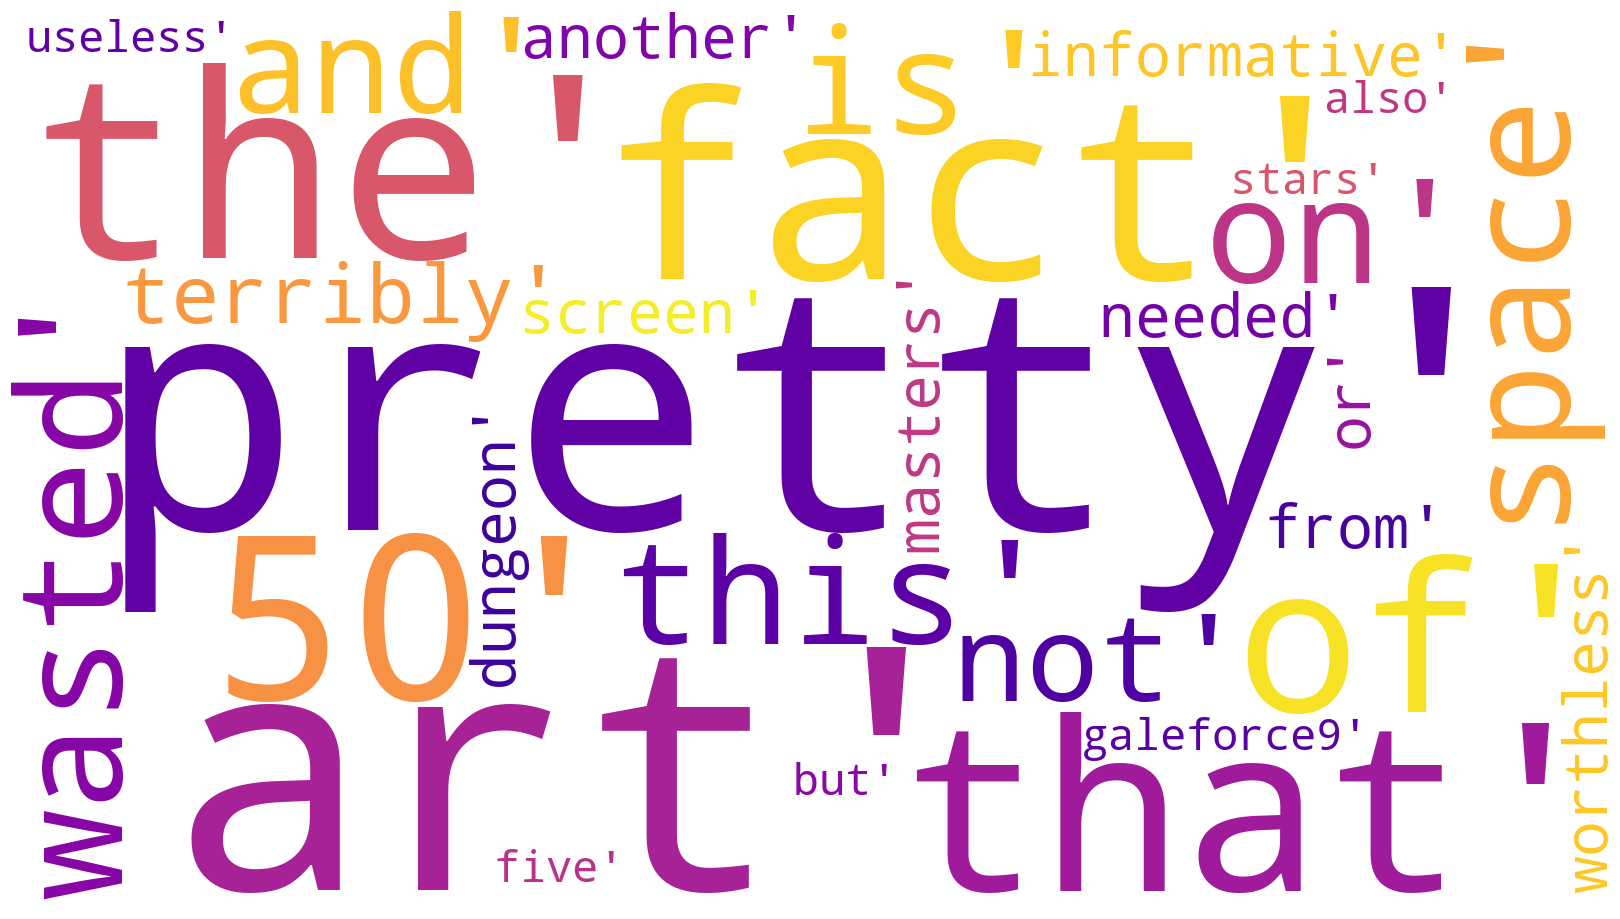

In [236]:
# Review: Plot the WordCloud image.
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud2) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# Note that your word cloud might differ slightly from the one provided.

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [237]:
# Determine the frequency distribution.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(review_comments)

# Preview data.
fdist

FreqDist({"'": 946, ',': 469, ' ': 469, 'e': 284, 't': 198, 'a': 175, 's': 164, 'n': 150, 'o': 137, 'r': 135, ...})

### 4b) Remove alphanumeric characters and stopwords

In [238]:
# Delete all the alpanum.
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
filtered = [word for word in review_comments if word.isalnum()]

In [239]:
# Remove all the stopwords
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
filtered2 = [x for x in filtered if x.lower() not in english_stopwords]

# Define an empty string variable.
filtered2_string = ''

for value in filtered:
    # Add each filtered token word to the string.
    filtered2_string = filtered2_string + value + ''

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexc_dra7fx5\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 4c) Create wordcloud without stopwords

In [240]:
# Create a wordcloud without stop words.
# Create a WordCloud.
wordcloud3 = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(filtered2_string) 


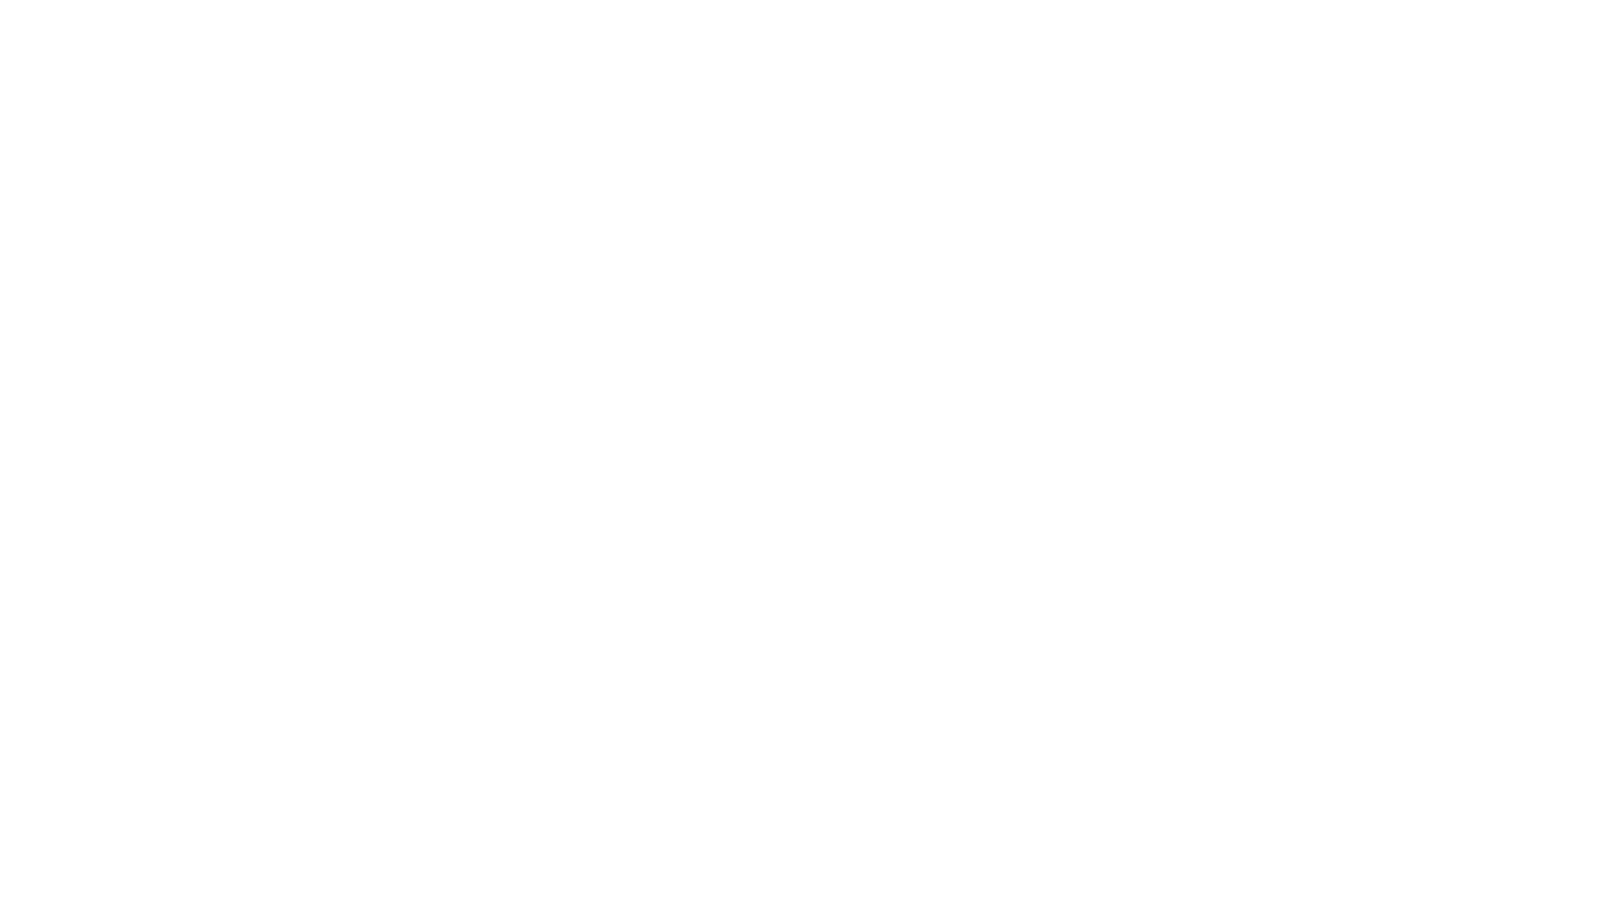

In [241]:
# Plot the wordcloud image.
# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud3) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [242]:
# Determine the 15 most common words.
# View the frequency distribution.
fdist1 = FreqDist(filtered2)

# Preview the data.
fdist1

FreqDist({'e': 284, 'n': 150, 'r': 135, 'l': 105, 'u': 87, 'h': 84, 'f': 57, 'c': 51, 'g': 40, 'p': 37, ...})

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [243]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [244]:
# Determine polarity of review column. 
newdf['reviewpolarity'] = newdf['review'].apply(generate_polarity)

# View output.
newdf['reviewpolarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: reviewpolarity, dtype: float64

In [245]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
newdf['reviewsubjectivity'] = newdf['review'].apply(generate_subjectivity)

# Preview the result.
newdf['reviewsubjectivity'].head()


0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: reviewsubjectivity, dtype: float64

In [246]:
# Determine polarity of review column. 
newdf['summarypolarity'] = newdf['summary'].apply(generate_polarity)

# View output.
newdf['summarypolarity'].head()


0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: summarypolarity, dtype: float64

In [247]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
newdf['summarysubjectivity'] = newdf['summary'].apply(generate_subjectivity)

# Preview the result.
newdf['summarysubjectivity'].head()


0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: summarysubjectivity, dtype: float64

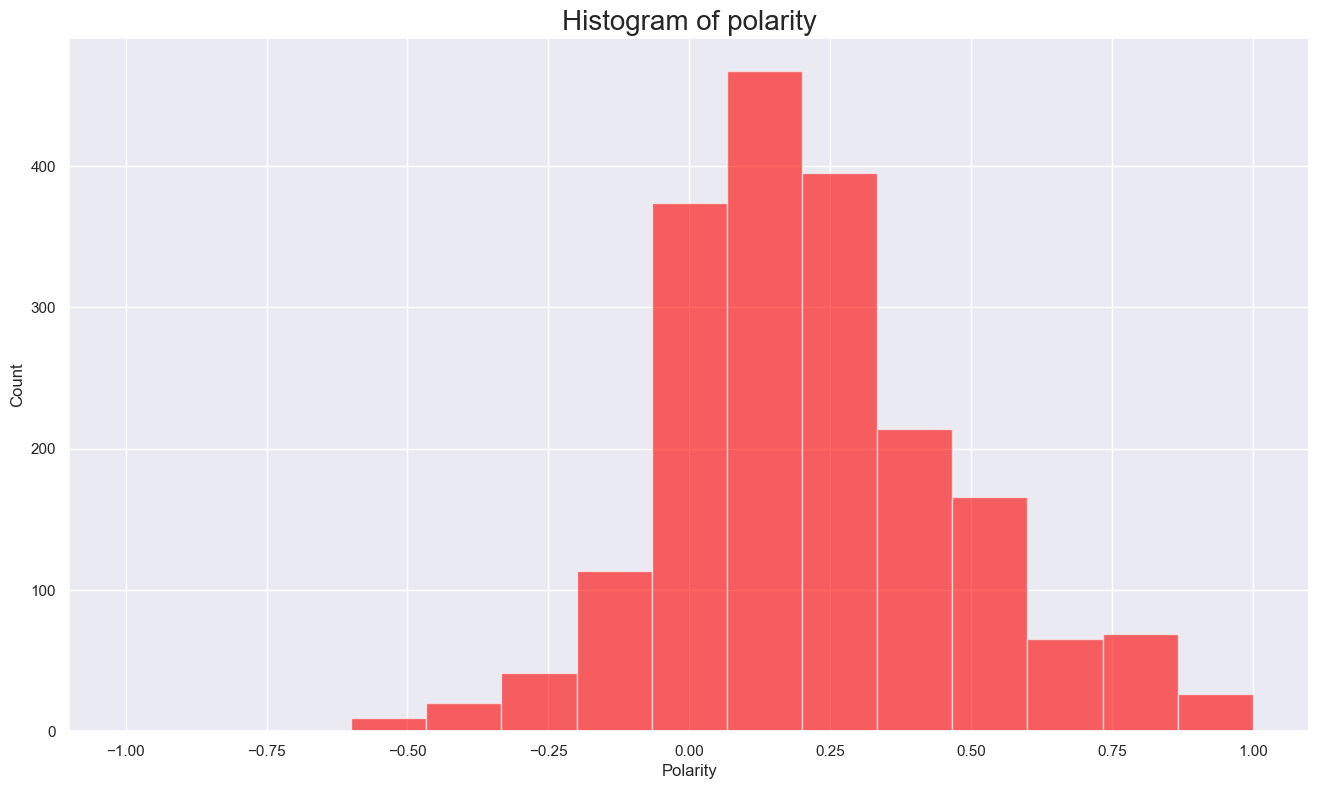

In [250]:
# Review: Create a histogram plot with bins = 15.

# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(newdf['reviewpolarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of polarity', fontsize=20)

plt.show()



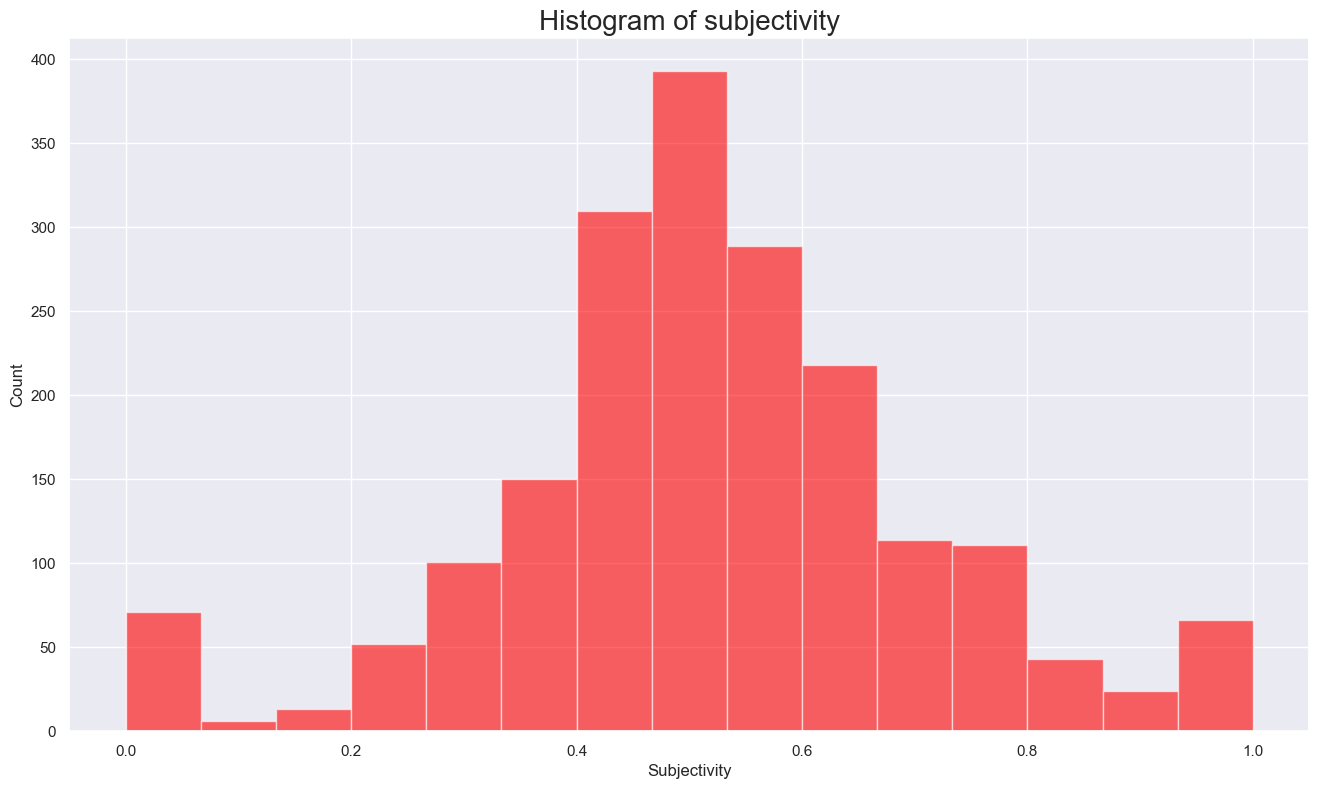

In [252]:
# Histogram of sentiment score

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(newdf['reviewsubjectivity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of subjectivity', fontsize=20)

plt.show()



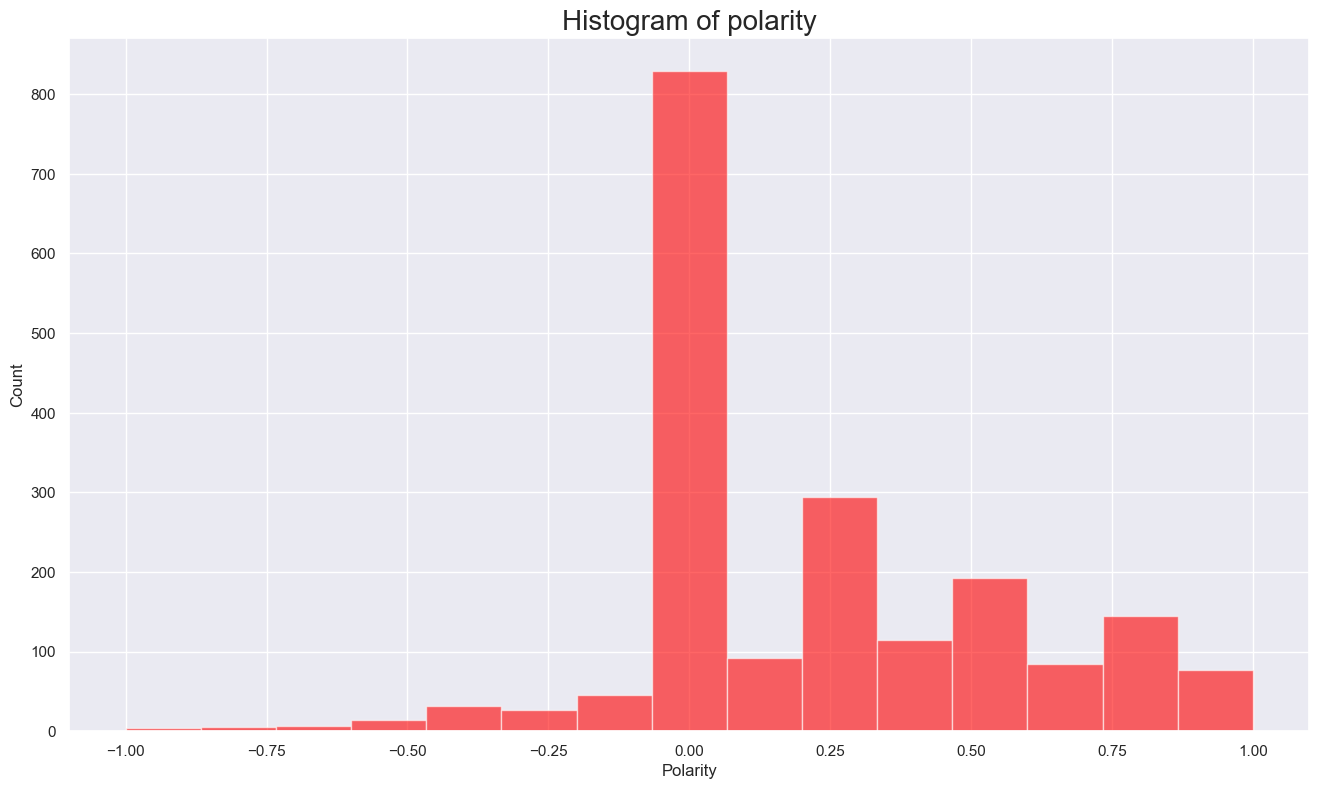

In [253]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(newdf['summarypolarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of polarity', fontsize=20)

plt.show()

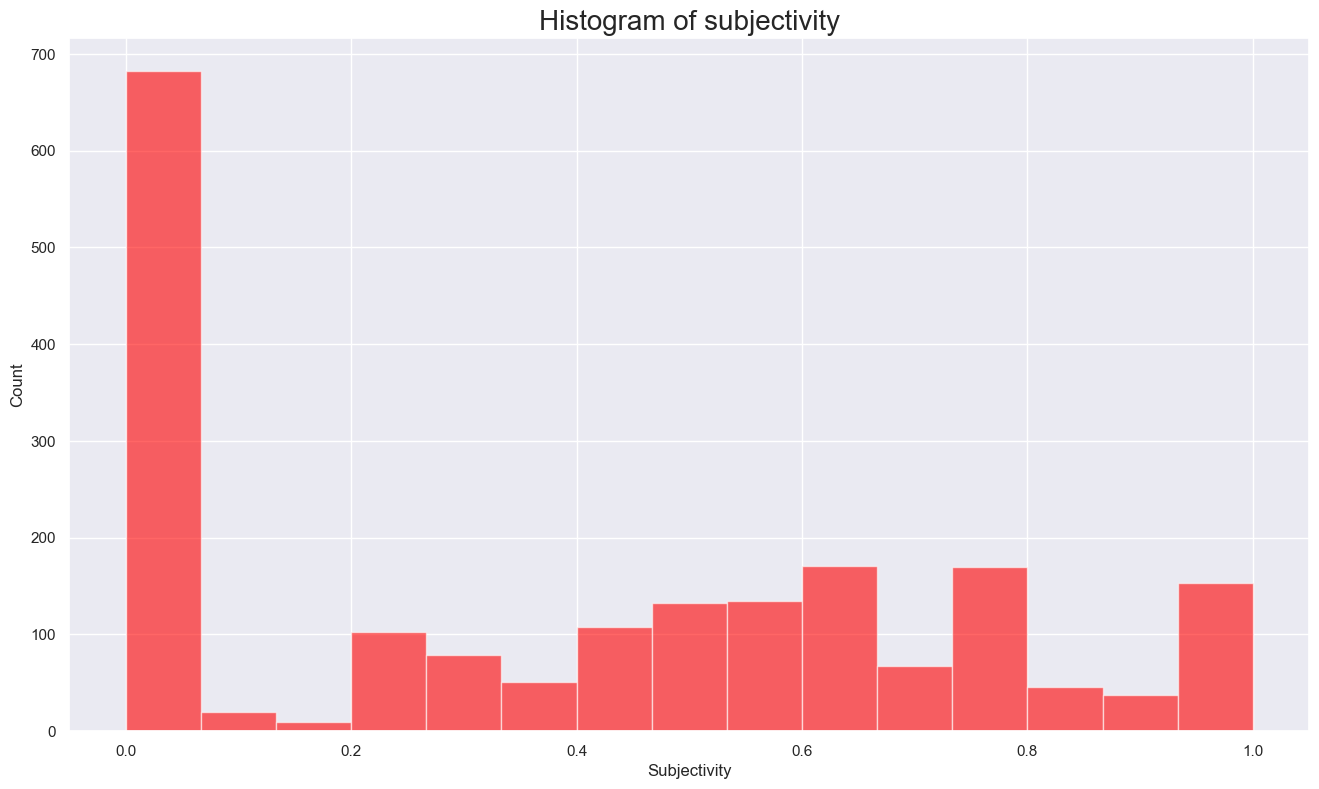

In [254]:
# Histogram of sentiment score
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(newdf['summarysubjectivity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of subjectivity', fontsize=20)

plt.show()


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [260]:
# Top 20 negative reviews.
# Create a DataFrame.
negative_polarityr = newdf.nsmallest(20, 'reviewpolarity')

# Drop unneccessary columns
negative_polarityreviews  = negative_polarityr.drop(columns=['summary', 'tokens1', 'tokens2', 'reviewsubjectivity'
                                                            , 'summarypolarity', 'summarysubjectivity'])

# View the output.
negative_polarityreviews 

,review,reviewpolarity
208,booo unles you are patient know how to measure...,-1.000000
182,incomplete kit very disappointing,-0.780000
1804,im sorry i just find this product to be boring...,-0.583333
364,one of my staff will be using this game soon s...,-0.550000
117,i bought this as a christmas gift for my grand...,-0.500000
227,this was a gift for my daughter i found it dif...,-0.500000
230,i found the directions difficult,-0.500000
290,instructions are complicated to follow,-0.500000
301,difficult,-0.500000
1524,expensive for what you get,-0.500000


In [267]:
# Top 20 negative summaries.
# Create a DataFrame.
negative_summaryr = newdf.nsmallest(20, 'summarypolarity')

# Drop unneccessary columns
negative_summaryreviews  = negative_summaryr.drop(columns=['review', 'tokens1', 'tokens2', 'reviewsubjectivity'
                                                            , 'reviewpolarity', 'summarysubjectivity'])

# View the output.
negative_summaryreviews 


,summary,summarypolarity
21,the worst value ive ever seen,-1.000000
208,boring unless you are a craft person which i am,-1.000000
829,boring,-1.000000
1166,before this i hated running any rpg campaign d...,-0.900000
1,another worthless dungeon masters screen from ...,-0.800000
144,disappointed,-0.750000
631,disappointed,-0.750000
793,disappointed,-0.750000
1620,disappointed,-0.750000
363,promotes anger instead of teaching calming met...,-0.700000


In [265]:
# Top 20 positive reviews.
# Create a DataFrame.
positive_polarityr = newdf.nlargest(20, 'reviewpolarity')

# Drop unneccessary columns
positive_polarityreviews  = positive_polarityr.drop(columns=['summary', 'tokens1', 'tokens2', 'reviewsubjectivity'
                                                            , 'summarypolarity', 'summarysubjectivity'])

# View the output.
positive_polarityreviews 


,review,reviewpolarity
7,came in perfect condition,1.0
165,awesome book,1.0
194,awesome gift,1.0
496,excellent activity for teaching selfmanagement...,1.0
524,perfect just what i ordered,1.0
591,wonderful product,1.0
609,delightful product,1.0
621,wonderful for my grandson to learn the resurre...,1.0
790,perfect,1.0
933,awesome,1.0


In [268]:
# Top 20 positive summaries.
# Create a DataFrame.
positive_summaryr = newdf.nlargest(20, 'summarypolarity')

# Drop unneccessary columns
positive_summaryreviews  = positive_summaryr.drop(columns=['review', 'tokens1', 'tokens2', 'reviewsubjectivity'
                                                            , 'reviewpolarity', 'summarysubjectivity'])

# View the output.
positive_summaryreviews 


# View output.


,summary,summarypolarity
6,best gm screen ever,1.0
28,wonderful designs,1.0
32,perfect,1.0
80,theyre the perfect size to keep in the car or ...,1.0
134,perfect for preschooler,1.0
140,awesome sticker activity for the price,1.0
161,awesome book,1.0
163,he was very happy with his gift,1.0
187,awesome,1.0
210,awesome and welldesigned for 9 year olds,1.0


## 7. Discuss: Insights and observations

***Your observations here...***

# 